# Regresion logistica con over-sampling

## Librerias

In [2]:
from auxiliares import woe,iv

import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc_curve,plot_confusion_matrix,plot_ks_statistic
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler

sns.set()
cf.go_offline()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Lectura de datos

In [3]:
train=pd.read_csv('~/train_discretizado.csv')
train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,mths_between_issued_earliest_cr,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,delinq_2yrs,inq_last_6mths,pub_rec,disc_loan_amnt_4,disc_funded_amnt_4,disc_funded_amnt_inv_4,disc_int_rate_4,disc_installment_4,disc_annual_inc_4,disc_dti_4,disc_open_acc_4,disc_revol_bal_4,disc_revol_util_4,disc_total_acc_4,disc_tot_cur_bal_4,disc_total_rev_hi_lim_4,disc_mths_between_issued_earliest_cr_4,disc_collections_12_mths_ex_med_4,disc_acc_now_delinq_4,disc_tot_coll_amt_4,disc_delinq_2yrs_4,disc_inq_last_6mths_4,disc_pub_rec_4,disc_loan_amnt_5,disc_funded_amnt_5,disc_funded_amnt_inv_5,disc_int_rate_5,disc_installment_5,disc_annual_inc_5,disc_dti_5,disc_open_acc_5,disc_revol_bal_5,disc_revol_util_5,disc_total_acc_5,disc_tot_cur_bal_5,disc_total_rev_hi_lim_5,disc_mths_between_issued_earliest_cr_5,disc_collections_12_mths_ex_med_5,disc_acc_now_delinq_5,disc_tot_coll_amt_5,disc_delinq_2yrs_5,disc_inq_last_6mths_5,disc_pub_rec_5,disc_loan_amnt_6,disc_funded_amnt_6,disc_funded_amnt_inv_6,disc_int_rate_6,disc_installment_6,disc_annual_inc_6,disc_dti_6,disc_open_acc_6,disc_revol_bal_6,disc_revol_util_6,disc_total_acc_6,disc_tot_cur_bal_6,disc_total_rev_hi_lim_6,disc_mths_between_issued_earliest_cr_6,disc_collections_12_mths_ex_med_6,disc_acc_now_delinq_6,disc_tot_coll_amt_6,disc_delinq_2yrs_6,disc_inq_last_6mths_6,disc_pub_rec_6,disc_loan_amnt_7,disc_funded_amnt_7,disc_funded_amnt_inv_7,disc_int_rate_7,disc_installment_7,disc_annual_inc_7,disc_dti_7,disc_open_acc_7,disc_revol_bal_7,disc_revol_util_7,disc_total_acc_7,disc_tot_cur_bal_7,disc_total_rev_hi_lim_7,disc_mths_between_issued_earliest_cr_7,disc_collections_12_mths_ex_med_7,disc_acc_now_delinq_7,disc_tot_coll_amt_7,disc_delinq_2yrs_7,disc_inq_last_6mths_7,disc_pub_rec_7,disc_loan_amnt_8,disc_funded_amnt_8,disc_funded_amnt_inv_8,disc_int_rate_8,disc_installment_8,disc_annual_inc_8,disc_dti_8,disc_open_acc_8,disc_revol_bal_8,disc_revol_util_8,disc_total_acc_8,disc_tot_cur_bal_8,disc_total_rev_hi_lim_8,disc_mths_between_issued_earliest_cr_8,disc_collections_12_mths_ex_med_8,disc_acc_now_delinq_8,disc_tot_coll_amt_8,disc_delinq_2yrs_8,disc_inq_last_6mths_8,disc_pub_rec_8,disc_loan_amnt_9,disc_funded_amnt_9,disc_funded_amnt_inv_9,disc_int_rate_9,disc_installment_9,disc_annual_inc_9,disc_dti_9,disc_open_acc_9,disc_revol_bal_9,disc_revol_util_9,disc_total_acc_9,disc_tot_cur_bal_9,disc_total_rev_hi_lim_9,disc_mths_between_issued_earliest_cr_9,disc_collections_12_mths_ex_med_9,disc_acc_now_delinq_9,disc_tot_coll_amt_9,disc_delinq_2yrs_9,disc_inq_last_6mths_9,disc_pub_rec_9,disc_loan_amnt_10,disc_funded_amnt_10,disc_funded_amnt_inv_10,disc_int_rate_10,disc_installment_10,disc_annual_inc_10,disc_dti_10,disc_open_acc_10,disc_revol_bal_10,disc_revol_util_10,disc_total_acc_10,disc_tot_cur_bal_10,disc_total_rev_hi_lim_10,disc_mths_between_issued_earliest_cr_10,disc_collections_12_mths_ex_med_10,disc_acc_now_delinq_10,disc_tot_coll_amt_10,disc_delinq_2yrs_10,disc_inq_last_6mths_10,disc_pub_rec_10,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_mths_since_last_major_derog,target,woe_term,woe_grade,woe_emp_length,woe_home_ownership,woe_verification_status,woe_pymnt_plan,woe_purpose,woe_addr_state,woe_initial_list_status,woe_disc_loan_amnt_4,woe_disc_funded_amnt_4,woe_disc_funded_amnt_inv_4,woe_disc_int_rate_4,woe_disc_installment_4,woe_disc_annual_inc_4,woe_disc_dti_4,woe_disc_open_acc_4,woe_disc_revol_bal_4,woe_disc_revol_util_4,woe_disc_total_acc_4,woe_disc_tot_cur_bal_4,woe_disc_total_rev_hi_lim_4,woe_disc_mths_between_issued_earliest_cr_4,woe_disc_collections_12_mths_ex_med_4,woe_disc_acc_now_delinq_4,woe_disc_tot_coll_amt_4,woe_disc_delinq_2yrs_4,woe_disc_inq_last_6mths_4,woe_disc_pub_rec_4,woe_disc_loan_amnt_5,woe_disc_funded_amnt_5,w

## Selección de variables

In [4]:
vard=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', ]

vars=[v for v in train.columns if v[:4]=='disc']+vard

um = 'id'

target='target'

### IV

In [5]:
aux=pd.Series({v:iv(train,v,target) for v in vars}).sort_values(ascending=False).reset_index().rename(columns={'index':'variable',0:'iv'})
best_iv=aux[aux['iv']>0.02]
best_iv.iplot(kind='bar',x='variable',y='iv',title='IV de las variables discretizadas')

### $\chi^2$ test

In [6]:
le=LabelEncoder()
chi2_test=SelectKBest(chi2,k=len(best_iv['variable']))
chi2_test.fit(train[best_iv['variable']].apply(lambda x:le.fit_transform(x)),train[target])

SelectKBest(k=62, score_func=<function chi2 at 0x7f8c937acf70>)

In [7]:
best_chi2=pd.DataFrame({'variable':chi2_test.feature_names_in_,'chi2':chi2_test.scores_,'p-value':chi2_test.pvalues_})\
    .sort_values('chi2',ascending=False).reset_index(drop=True)
best_chi2=best_chi2[best_chi2['p-value']<0.05]
best_chi2.iplot(kind='bar',x='variable',y='chi2',title='Chi2 de las variables discretizadas')

In [8]:
# variables con iv>.02 y chi2_p-value<.05 
best=best_iv.merge(best_chi2,on='variable',how='inner').sort_values(by=['iv','chi2'],ascending=[False,False])

In [9]:
from varclushi import VarClusHi

In [10]:
vc = VarClusHi(df=train,feat_list=[f'woe_{x}' for x in best['variable']]).varclus()

In [11]:
best_var=vc.rsquare.sort_values(by=['Cluster','RS_Ratio'])
best_var['Variable']=best_var['Variable'].apply(lambda x: x[4:])
best_var=best_var.merge(best,left_on='Variable',right_on='variable',how='inner').drop('variable',axis=1)\
    .sort_values(by=['Cluster','iv','chi2'],ascending=[True,False,False]).reset_index(drop=True).groupby('Cluster').first()['Variable'].tolist()

In [12]:
best_var=[*map(lambda x:f'woe_{x}',best_var)]
best_var

['woe_disc_tot_cur_bal_10',
 'woe_disc_int_rate_10',
 'woe_disc_inq_last_6mths_5',
 'woe_disc_dti_9',
 'woe_disc_annual_inc_10',
 'woe_disc_revol_util_8',
 'woe_disc_mths_between_issued_earliest_cr_8',
 'woe_disc_total_rev_hi_lim_10',
 'woe_term',
 'woe_purpose']

## Over-sampling los datos de entrenamiento

In [14]:
ros = RandomOverSampler(random_state=123)
train_ovs=pd.concat(ros.fit_resample(train[best_var], train[target]),axis=1)

In [15]:
train_ovs.target.value_counts(1)
# muestra balanceada, oversampling la clase 1 (malos)

0    0.5
1    0.5
Name: target, dtype: float64

## Regresión logística en datos de entrenamiento

In [17]:
lr=LogisticRegression()
lr.fit(train_ovs[best_var],train_ovs['target'])

LogisticRegression()

In [18]:
lr.intercept_,lr.coef_

(array([-0.00517739]),
 array([[-0.65962218, -0.86316683, -0.60650077, -0.65598451, -0.52671732,
         -0.17644136, -0.34906373, -0.40598703, -0.21398964, -0.49390327]]))

## Desempeño del modelo en datos de entrenamiento

In [20]:
accuracy_score(train_ovs['target'],lr.predict(train_ovs[best_var]))

0.6317792660316937

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

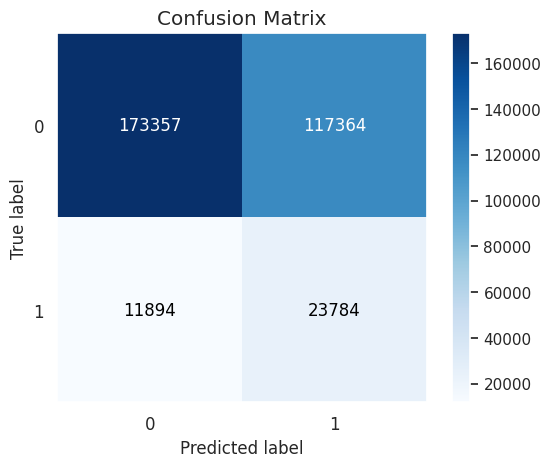

In [21]:
plot_confusion_matrix(train['target'],lr.predict(train[best_var]))
# predice todos como buenos, lo logra distinguir los clientes malos

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

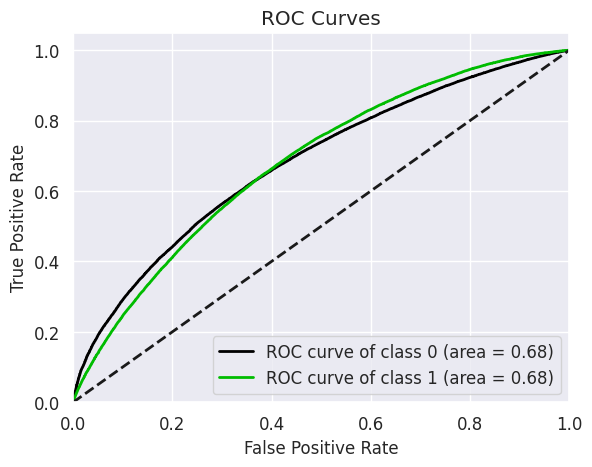

In [22]:
plot_roc_curve(train['target'],lr.predict_proba(train[best_var]),curves=('each_class'))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

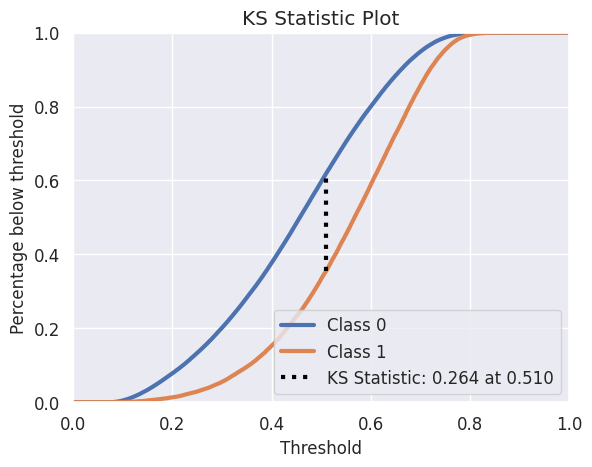

In [23]:
plot_ks_statistic(train['target'],lr.predict_proba(train[best_var]))

## Desempeño del modelo en datos de entrenamiento

In [24]:
test=pd.read_csv('~/test_discretizado.csv')

In [25]:
accuracy_score(test['target'],lr.predict(test[best_var]))

0.6052070972077263

In [26]:
test.target.value_counts(normalize=True)

0    0.890697
1    0.109303
Name: target, dtype: float64

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

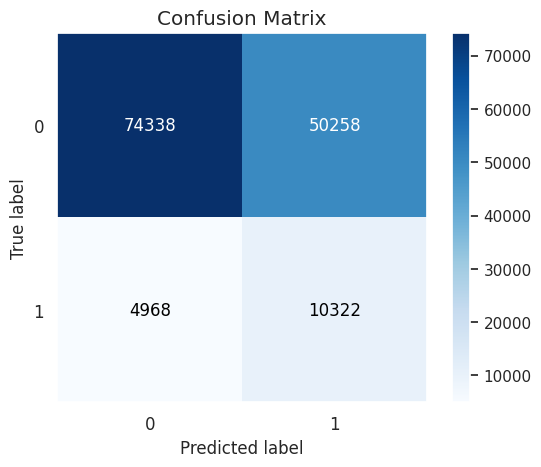

In [27]:
plot_confusion_matrix(test['target'],lr.predict(test[best_var]))
# predice todos como buenos, lo logra distinguir los clientes malos

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

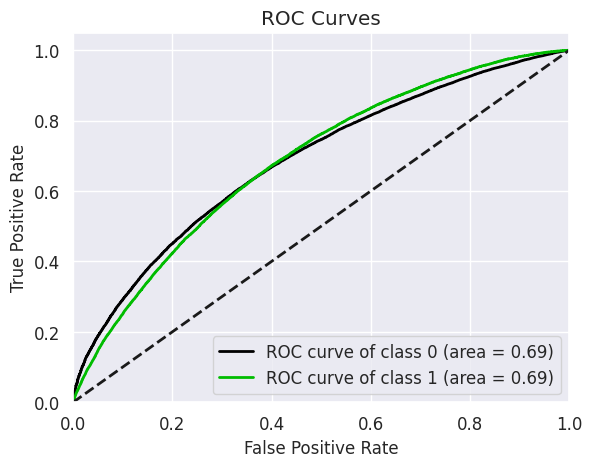

In [28]:
plot_roc_curve(test['target'],lr.predict_proba(test[best_var]),curves=('each_class'))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

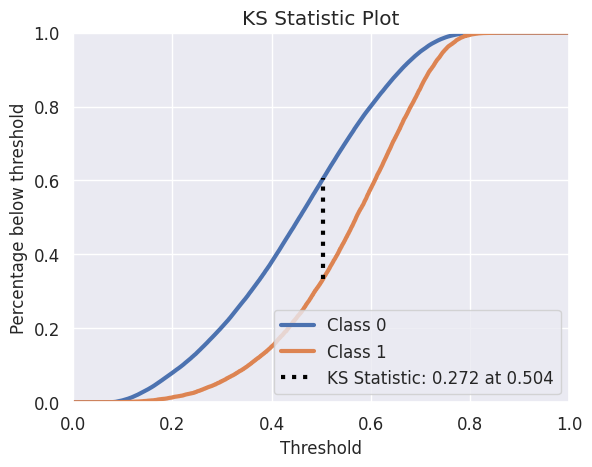

In [29]:
plot_ks_statistic(test['target'],lr.predict_proba(test[best_var]))